# Problem Statement

An Insurance Company should be able to identify prospective vehicle Insurance holders from within its existing pool of health Insurance holders. Successful cross selling efforts could also strengthen the brand’s image and position in the Insurance market. 

# Data Description

This dataset contains information about customers who all are buying Health Insurance.Our aim is to find that which customer is ready to take Vehicle Insurance also.

**Id:**Unique ID for customers

**Gender:** Gender of the customer

**Age:**Age of the customer

**Driving_License:**0: Customer does not have DL. 1: Customer already has DL

**Region_Code:**Unique code for region of the customer

**Previously_Insured:**0: Customer does not have Vehicle Insurance. 1:Customer already has Vehicle       Insurance

**Vehicle_Age**: Age of the Vehicle

**Vehicle_Damage**: 0: Customer didn’t get his/her damaged vehicle in the past. 1: Customer got his/her vehicle damaged in the past

**Annual_Premium**: The amount needs to pay as premium in the year

**PolicySalesChannel**: Anonymized Code for the channel of outreaching to the customer, i.e. Different Agents, Over Mail, Over Phone, In person, etc.

**Vintage**: Number of Days customer has been associated with the company

**Response**: 0:Customer is not interested. 1: Customer is interested



In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('D:\\Great learning\\Course\\Capstone\\Health Insurance Cross Sell Prediction\\train.csv')

# Dataset Description

In [20]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [21]:
df.size

4573308

In [22]:
df.shape

(381109, 12)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [24]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [25]:
df.select_dtypes(include=np.object).head()

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


In [26]:
df.select_dtypes(include=np.object).nunique()

Gender            2
Vehicle_Age       3
Vehicle_Damage    2
dtype: int64

In [27]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### Inferences - 
- The training dataset contains close to 380K or 3.8 lakh records.
- The training dataset has 11 independent features and 1 dependent / target variable.
- Within the independent features, 3 are categorical features
- Remaining 8 are numerical in nature.
- The dataset contains no missing values.
- The no. of unique categories within the categorical features are between 2-3.

# Data Cleaning

In [28]:
for i in df.select_dtypes(include=np.object).columns:
    print(i)
    print(df[i].unique())
    print()

Gender
['Male' 'Female']

Vehicle_Age
['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage
['Yes' 'No']



In [29]:
df.describe().iloc[:,:-1]

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000


In [30]:
for i in df.select_dtypes(include=np.number).columns[:-1]:
    print(i)
    print(df[i].nunique())
    print()

id
381109

Age
66

Driving_License
2

Region_Code
53

Previously_Insured
2

Annual_Premium
48838

Policy_Sales_Channel
155

Vintage
290



In [31]:
df.select_dtypes(include=np.number).head().iloc[:,:-1]

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,40454.0,26.0,217
1,2,76,1,3.0,0,33536.0,26.0,183
2,3,47,1,28.0,0,38294.0,26.0,27
3,4,21,1,11.0,1,28619.0,152.0,203
4,5,29,1,41.0,1,27496.0,152.0,39


#### Observations - 
From the observations made on the structure and values present in the features and on comparing them with the description of the variables, we can conclude -
- ID will be of no use to us as it will be unique to each record. Hence it can be removed.
- Region_Code should be a categorical feature as it contains a code for the location the customer resides in.
- Policy Sales Channel should be categorical as it contains codes for various type of sales channels.
- Driving Licence should be a categorical feature as it contains only 2 values i.e 0 and 1 with each number depicting whether a customer has a driving licence or not.
- Previously ensured should be a categorical feature as it contains only 2 values i.e 0 and 1 with each number depicting whether a customer had previously taken an insurance or not.
- Response (target feature) should also be a categorical feature as it contains only 2 values i.e 0 and 1 with each number depicting whether a health insurance customer will take a vehicle insurance or not.
- Also, so better clarity on categories for the purpose of model building and feature selection, we will give proper labels to the categories of driving license and previously ensured

In [32]:
df.drop('id',axis=1,inplace=True)

In [33]:
df[["Region_Code","Policy_Sales_Channel"]] = df[["Region_Code","Policy_Sales_Channel"]].astype('int').astype("object")

In [34]:
df[["Driving_License","Previously_Insured","Response"]] = df[["Driving_License","Previously_Insured","Response"]].astype('object') 


In [35]:
df.Driving_License.replace({1:"Has_License",0:"No_License"},inplace=True)
df.Previously_Insured.replace({1:"Vehicle_Insured",0:"Vehicle_Not_Insured"},inplace=True)
df.Vehicle_Damage.replace({"Yes":"Vehicle_Damaged","No":"Vehicle_Not_Damaged"},inplace=True)
df.Vehicle_Age.replace({"> 2 Years":"MoreThan2Years","1-2 Year":"Years1-2","< 1 Year":"LessThan1Year"},inplace=True)

In [36]:
df.select_dtypes(include=np.object).head()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
0,Male,Has_License,28,Vehicle_Not_Insured,MoreThan2Years,Vehicle_Damaged,26,1
1,Male,Has_License,3,Vehicle_Not_Insured,Years1-2,Vehicle_Not_Damaged,26,0
2,Male,Has_License,28,Vehicle_Not_Insured,MoreThan2Years,Vehicle_Damaged,26,1
3,Male,Has_License,11,Vehicle_Insured,LessThan1Year,Vehicle_Not_Damaged,152,0
4,Female,Has_License,41,Vehicle_Insured,LessThan1Year,Vehicle_Not_Damaged,152,0


In [37]:
df.select_dtypes(include=np.number).head()

,Age,Annual_Premium,Vintage
0,44,40454.0,217
1,76,33536.0,183
2,47,38294.0,27
3,21,28619.0,203
4,29,27496.0,39


# Exploratory Data Analysis

## Univariate Analysis

In [38]:
num_data = df.select_dtypes(include=np.number)
cat_data = df.select_dtypes(include=np.object)

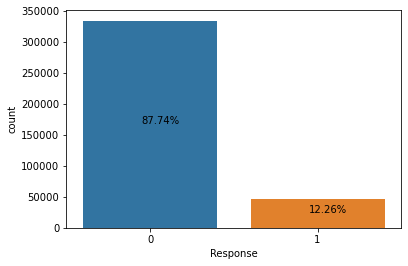

In [39]:
sns.countplot(df['Response']);
pct_0=str(round(df['Response'].value_counts(1)[0]*100,2)) + str('%')
pct_1=str(round(df['Response'].value_counts(1)[1]*100,2)) + str('%')
plt.text(x=-0.05,y=df['Response'].value_counts()[0]/2,s=pct_0)
plt.text(x=0.95,y=df['Response'].value_counts()[1]/2,s=pct_1)
plt.show()

In [40]:
num_data.skew()

Age               0.672539
Annual_Premium    1.766087
Vintage           0.003030
dtype: float64

In [41]:
num_data.describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


# Age Dist.

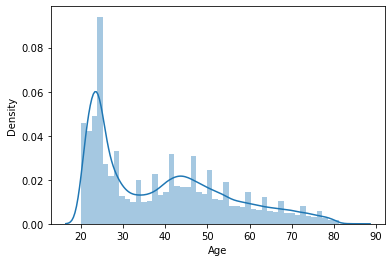

In [42]:
sns.distplot(df.Age);
plt.show()

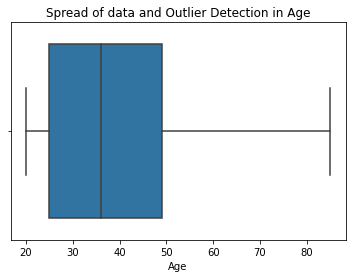

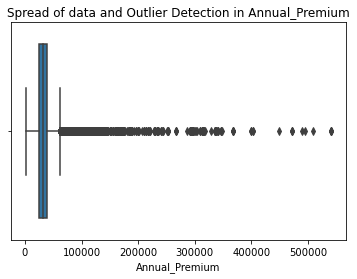

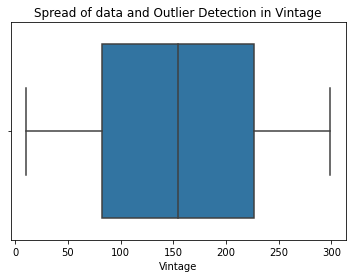

In [44]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.title(f"Spread of data and Outlier Detection in {i}")
    plt.show()

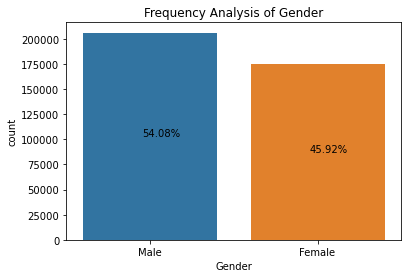

In [45]:
sns.countplot(cat_data.Gender)
plt.title("Frequency Analysis of Gender")
pct_0=str(round(cat_data.Gender.value_counts(1)[0]*100,2)) + str('%')
pct_1=str(round(cat_data.Gender.value_counts(1)[1]*100,2)) + str('%')
plt.text(x=-0.05,y=cat_data.Gender.value_counts()[0]/2,s=pct_0)
plt.text(x=0.95,y=cat_data.Gender.value_counts()[1]/2,s=pct_1)
plt.show()

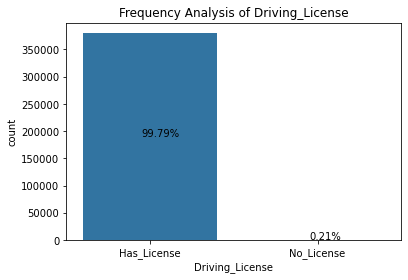

In [46]:
sns.countplot(cat_data.Driving_License)
plt.title("Frequency Analysis of Driving_License")
pct_0=str(round(cat_data.Driving_License.value_counts(1)[0]*100,2)) + str('%')
pct_1=str(round(cat_data.Driving_License.value_counts(1)[1]*100,2)) + str('%')
plt.text(x=-0.05,y=cat_data.Driving_License.value_counts()[0]/2,s=pct_0)
plt.text(x=0.95,y=cat_data.Driving_License.value_counts()[1]/2,s=pct_1)
plt.show()

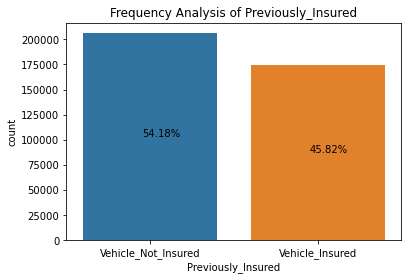

In [47]:
sns.countplot(cat_data.Previously_Insured)
plt.title("Frequency Analysis of Previously_Insured")
pct_0=str(round(cat_data.Previously_Insured.value_counts(1)[0]*100,2)) + str('%')
pct_1=str(round(cat_data.Previously_Insured.value_counts(1)[1]*100,2)) + str('%')
plt.text(x=-0.05,y=cat_data.Previously_Insured.value_counts()[0]/2,s=pct_0)
plt.text(x=0.95,y=cat_data.Previously_Insured.value_counts()[1]/2,s=pct_1)
plt.show()

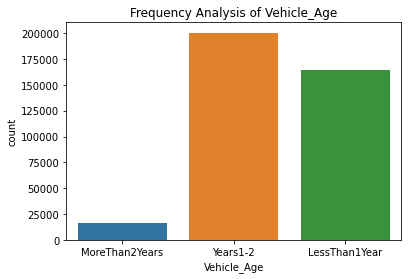

In [48]:
sns.countplot(cat_data.Vehicle_Age)
plt.title("Frequency Analysis of Vehicle_Age")
plt.show()

In [49]:
cat_data.Vehicle_Age.value_counts(1)*100

Years1-2          52.561341
LessThan1Year     43.238549
MoreThan2Years     4.200111
Name: Vehicle_Age, dtype: float64

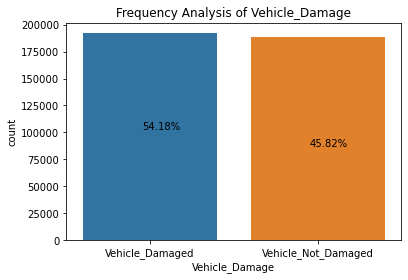

In [50]:
sns.countplot(cat_data.Vehicle_Damage)
plt.title("Frequency Analysis of Vehicle_Damage")
pct_0=str(round(cat_data.Previously_Insured.value_counts(1)[0]*100,2)) + str('%')
pct_1=str(round(cat_data.Previously_Insured.value_counts(1)[1]*100,2)) + str('%')
plt.text(x=-0.05,y=cat_data.Previously_Insured.value_counts()[0]/2,s=pct_0)
plt.text(x=0.95,y=cat_data.Previously_Insured.value_counts()[1]/2,s=pct_1)
plt.show()

In [51]:
cat_data.Vehicle_Damage.value_counts(1)*100

Vehicle_Damaged        50.487656
Vehicle_Not_Damaged    49.512344
Name: Vehicle_Damage, dtype: float64

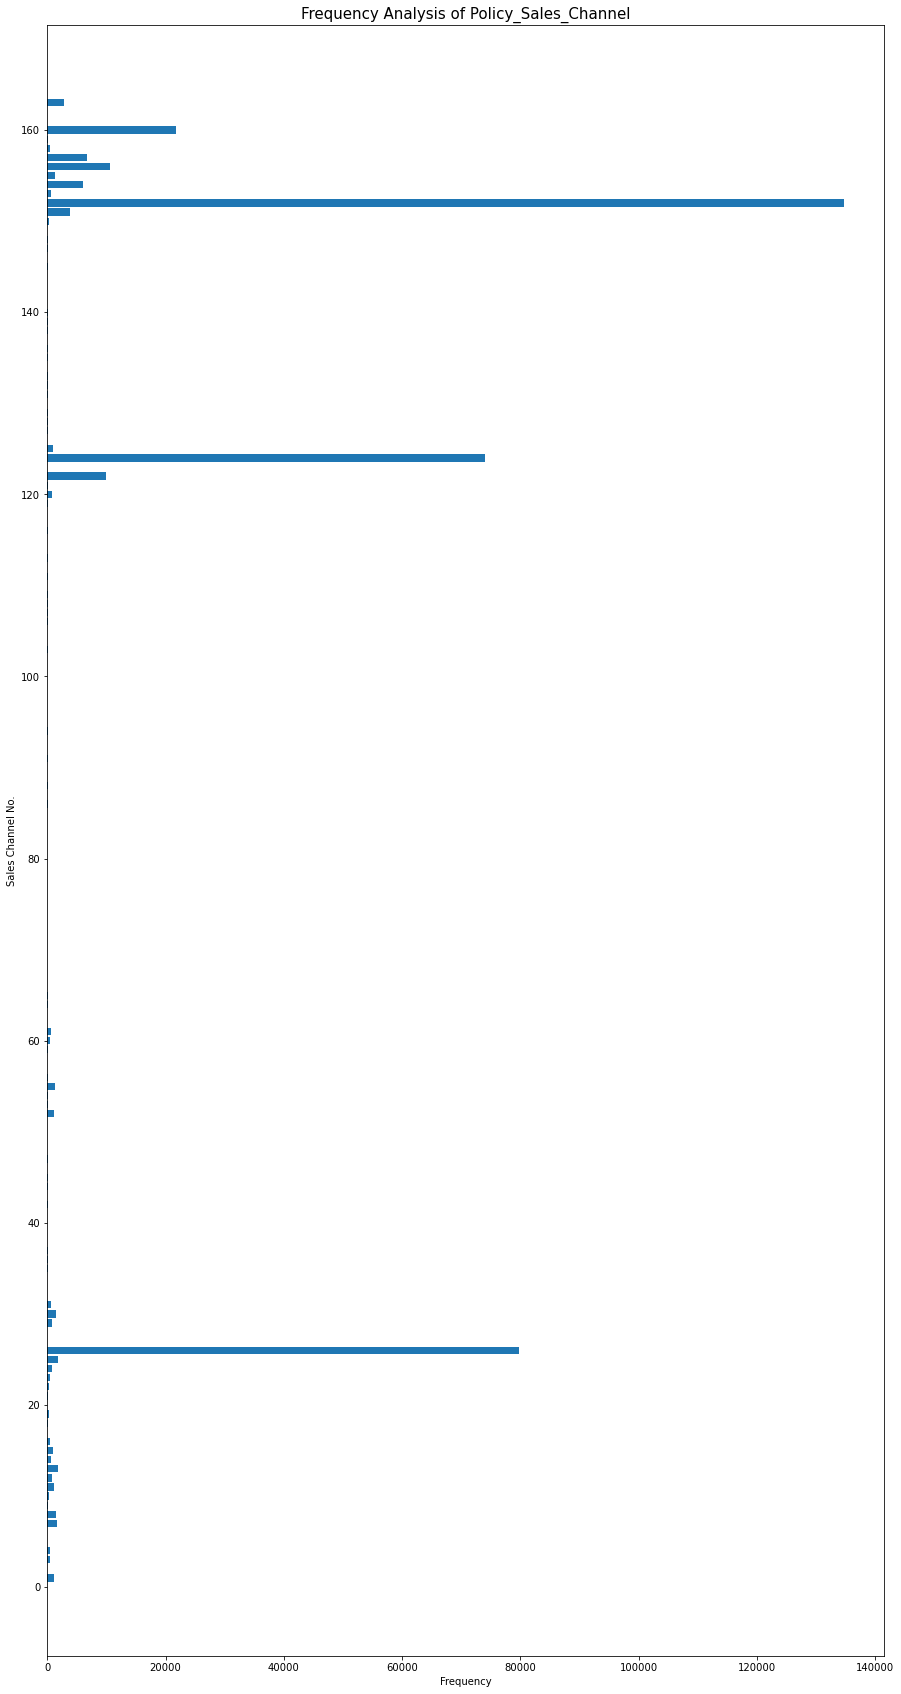

In [53]:
plt.figure(figsize=(15,30))
labels = df.Policy_Sales_Channel.value_counts().index
values = df.Policy_Sales_Channel.value_counts()
plt.barh(y=labels,width=values)
plt.ylabel("Sales Channel No.")
plt.xlabel("Frequency")
plt.title("Frequency Analysis of Policy_Sales_Channel",size=15)
plt.show()

In [54]:
cat_data.Policy_Sales_Channel.value_counts(1)*100

152    35.366260
26     20.912652
124    19.415705
160     5.714638
156     2.797362
         ...    
149     0.000262
43      0.000262
144     0.000262
143     0.000262
41      0.000262
Name: Policy_Sales_Channel, Length: 155, dtype: float64

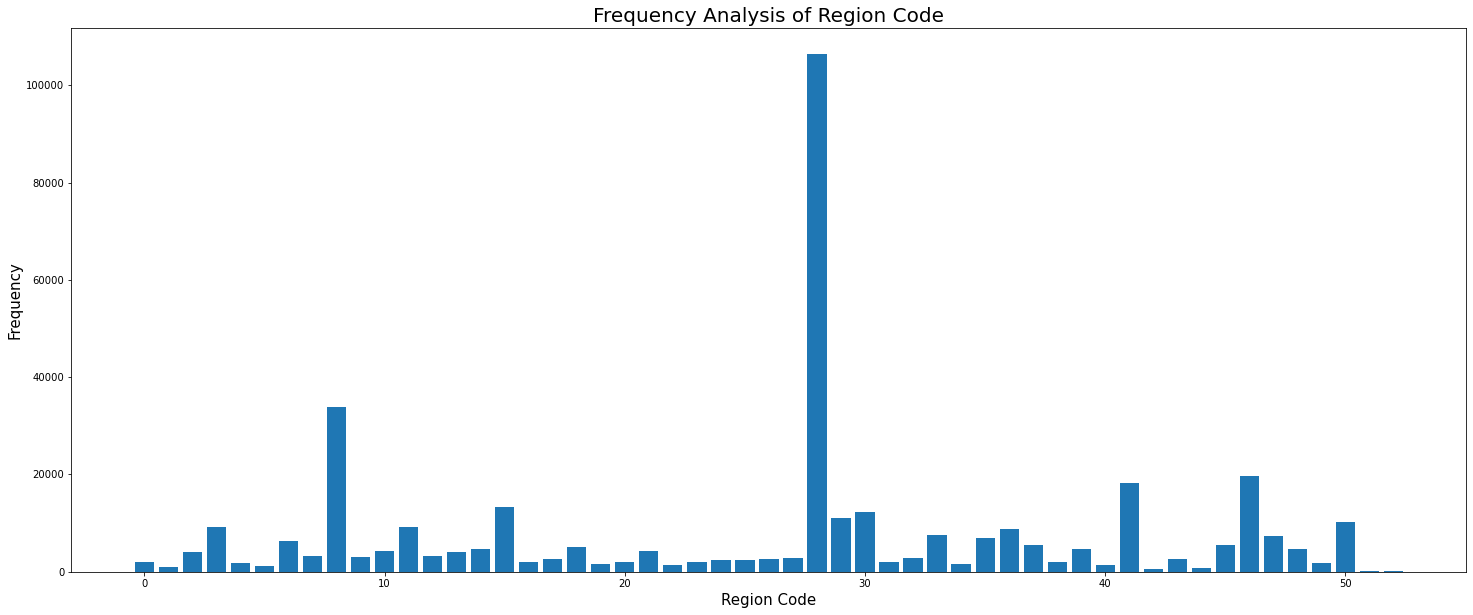

In [55]:
plt.figure(figsize=(25,10))
labels = df.Region_Code.value_counts().index
values = df.Region_Code.value_counts()
plt.bar(x=labels,height=values)
plt.xlabel("Region Code",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Frequency Analysis of Region Code",size=20)
plt.show()

In [56]:
cat_data.Region_Code.value_counts(1)*100

28    27.922458
8      8.889058
46     5.181982
41     4.792067
15     3.491914
30     3.198822
29     2.903369
50     2.687683
3      2.427390
11     2.422404
36     2.308264
33     2.008349
47     1.951148
35     1.821526
6      1.647823
45     1.470708
37     1.443419
18     1.352107
48     1.228258
14     1.227470
39     1.218549
10     1.147703
21     1.119365
2      1.059539
13     1.059015
7      0.860384
12     0.839130
9      0.813678
27     0.740733
32     0.731287
43     0.692453
17     0.686680
26     0.678808
25     0.656767
24     0.633677
38     0.531606
0      0.530294
16     0.526621
31     0.514289
23     0.514289
20     0.507729
49     0.480702
4      0.472568
34     0.436620
19     0.402772
22     0.343471
40     0.339798
5      0.335600
1      0.264491
44     0.212013
42     0.155074
52     0.070059
51     0.048018
Name: Region_Code, dtype: float64

#### Inferences - 
For Numerical Features - 
- Age and Annual Premium are postively skewed, with annual premium having a large skewness values of 1.76
- Vintage or duration of tenure of customers is uniformly distributed.
- Due to very high skewness, Annual Premium has large frequency and large value outliers.


- Age of most of the insurance holders is around 20-30 years, with a significant number of holders also found to be in the range of 40-50 years. However, due to a slightly bi-model appearance, we can say the median age of insurance holders in this dataset is 36 years.
- Median Premium most health insurance holders pay per annum is around 31000.
- In respect to vintage, the no. of insurance holders who have held the insurance for a specific period are more or less uniform or identical. No clear majority.


For Categorcal Features - 
- Except Sales Channel and Region, all other categorical features have around 2-3 unique categories only.
- However, within dirving license, % of those without licence is less than 1%. Such a feature will not be of any use.
- Sales Channel and Region have more than 20 unique categories, which would make it difficult to encode later.
- However, we have also observed that both sales channel and region have only a few dominating categories, with others very svehiclecely represented. We can considering grouping such categories.


- We can observe that the target feature i.e whether a health insuance holder would be a vehicle insurance, is highly imbalanced, with 87% of health insurance holders not having purchased a vehicle insurance.
- We have more males than females in the dataset, but only by a margin of around 25k.
- Almost all the health insurance holders have a driving license
- More than 50% of the vehicle owners have vehicles which are around 1-2 years old.
- Amongst all vehicle owners, the proportion of those who suffered vehicle damage to those who didnt are nearly same.
- In terms of sales policy channels frequently adopted, we observed specific channels in the range 0-30, 120-125 and 150-160. However, the most adopted sales policy channels are 152, 26 and 124.
- In terms of region, we can see majority of the insurance holders coming from region number 28, followed by 8.

### Bi-variate Analysis

In [57]:
df[df.Response==0].describe()

,Age,Annual_Premium,Vintage
count,334399.000000,334399.000000,334399.000000
mean,38.178227,30419.160276,154.380243
std,15.816052,16998.293197,83.661975
min,20.000000,2630.000000,10.000000
25%,24.000000,24351.000000,82.000000
50%,34.000000,31504.000000,154.000000
75%,49.000000,39120.000000,227.000000
max,85.000000,540165.000000,299.000000


In [58]:
df[df.Response==1].describe()

,Age,Annual_Premium,Vintage
count,46710.000000,46710.000000,46710.000000
mean,43.435560,31604.092742,154.112246
std,12.168924,18646.508040,83.738574
min,20.000000,2630.000000,10.000000
25%,35.000000,24868.000000,82.000000
50%,43.000000,33002.000000,154.000000
75%,51.000000,41297.000000,226.000000
max,83.000000,540165.000000,299.000000


## Gender & Response

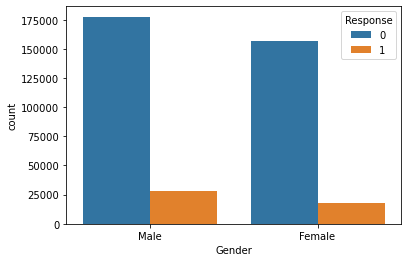

In [59]:
sns.countplot(df.Gender,hue=df.Response)
plt.show()

Inference: The number of Males, who have not insured their vehicle till now is more than females and same pattern is observed when
we comapre the males and females who have already insured.

## Driving License By Gender

In [60]:
b=df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
b

,Gender,Driving_License
0,Female,175020
1,Male,206089


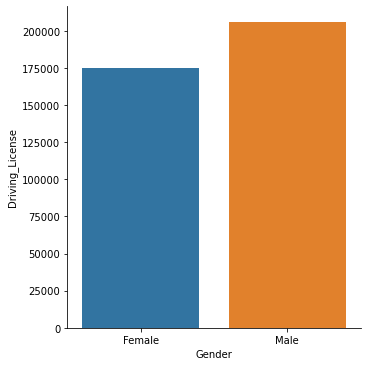

In [61]:
sns.catplot(x="Gender", y="Driving_License", data=b, kind="bar");

Inference: Number of Males having driving Licences is more as compared to those of Females.

## Customers Having Vehicle Insurance already vs Gender

In [62]:
df_plot = df.groupby(['Previously_Insured', 'Gender']).size().reset_index().pivot(columns='Gender', index='Previously_Insured', values=0)
df_plot

Gender,Female,Male
Previously_Insured,,
Vehicle_Insured,87949,86679
Vehicle_Not_Insured,87071,119410


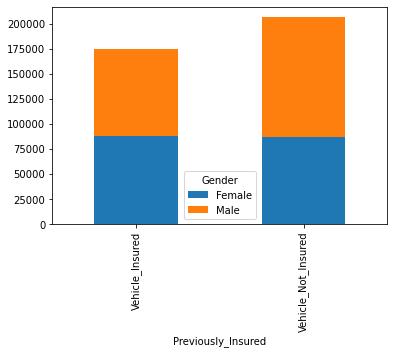

In [63]:
df_plot.plot(kind='bar',stacked=True)
plt.show()

Inference: The number of females who have previously taken and not taken insurance is almost same and the number of males who have previously not taken insurance is significantly more, which becomes the potential customer base for cross-selling
vehicle insurance.

## Customers Having Vehicle Insurance already vs Response

In [64]:
e = df.groupby(['Previously_Insured', 'Response']).size().reset_index().pivot(columns='Response', index='Previously_Insured', values=0)
e

Response,0,1
Previously_Insured,,
Vehicle_Insured,174470,158
Vehicle_Not_Insured,159929,46552


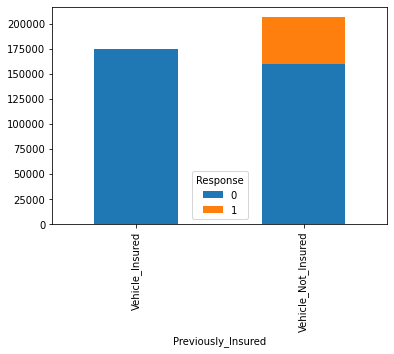

In [65]:
e.plot(kind='bar',stacked=True)
plt.show()

Inference: Customers who already have vehicle insurance are not interested, but we can see a very few people, despite having vehicle
insurance are interested in our company's insurance.(very thin orange line at the top of second bar ).

Customers who dont have vehicle insurance, majority of them are still not interested in it.

# Frequency Analysis- Response vs Driving License 

In [66]:
z = df.groupby(['Driving_License', 'Response']).size().reset_index().pivot(columns='Response', index='Driving_License', values=0)
z

Response,0,1
Driving_License,,
Has_License,333628,46669
No_License,771,41


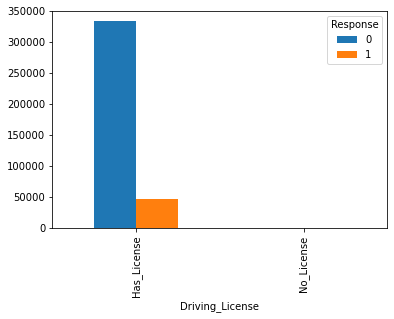

In [67]:
z.plot(kind='bar')
plt.show()

# Frequency Analysis- Response vs Vehicle Damage

In [68]:
x = df.groupby(['Vehicle_Damage', 'Response']).size().reset_index().pivot(columns='Response', index='Vehicle_Damage', values=0)
x

Response,0,1
Vehicle_Damage,,
Vehicle_Damaged,146685,45728
Vehicle_Not_Damaged,187714,982


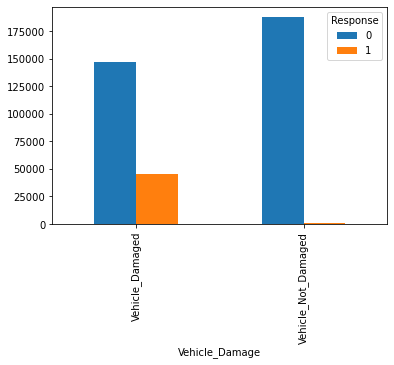

In [69]:
x.plot(kind='bar')
plt.show()

## Age vs Vehicle_Damage

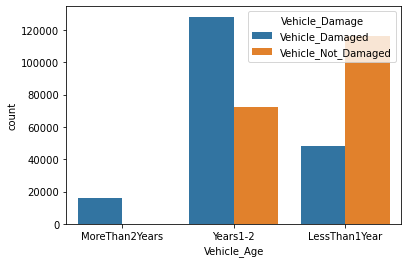

In [70]:
sns.countplot(df.Vehicle_Age,hue=df.Vehicle_Damage)
plt.show()

Inference: The majority of vehicles which are less than 1 year are not damaged

The vehicles which has >2 years age are almost damaged vehicles

The majority of vehicles which has 1-2 years of age are damaged vehicles.

In [78]:
print("STATISTICAL TEST - T-TEST INDEPENDENT SAMPLES")
print("To determine different in sample means of target class 0 and 1")
print("Null Hypothesis: There is no difference in means")
print('Alternate Hypothesis: There is a difference in means')
print()

for i in ["Age","Vintage"]:
    print(i)
    print("P value for no difference:",stats.ttest_ind(df[df.Response==0][i],df[df.Response==1][i])[1])
    print()

STATISTICAL TEST - T-TEST INDEPENDENT SAMPLES
To determine different in sample means of target class 0 and 1
Null Hypothesis: There is no difference in means
Alternate Hypothesis: There is a difference in means

Age
P value for no difference: 0.0

Vintage
P value for no difference: 0.5167036521412091



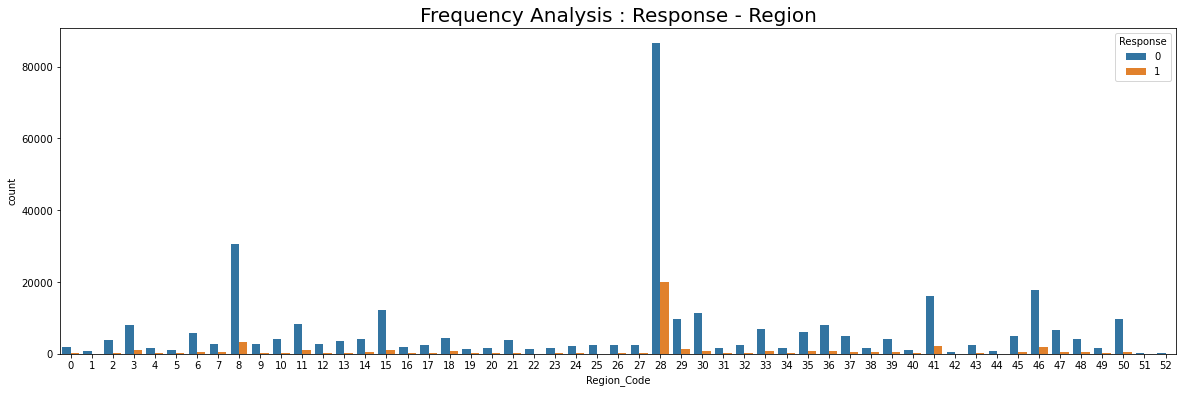

In [75]:
plt.figure(figsize = (20,6))
sns.countplot(x=df.Region_Code,hue=df.Response)
plt.title("Frequency Analysis : Response - Region",size=20)
plt.show()

In [79]:
print("STATISTICAL TEST - CHI SQUARE TEST OF INDEPENDENCE")
print("To determine different in target classes are dependent on the predictors")
print("Null Hypothesis: The target class and predictor are independent of each other.")
print('Alternate Hypothesis: The target class and predictor are independent of each other.')
print()

for i in cat_data.columns[:-1]:
    print(i)
    print("P value for no difference:",stats.chi2_contingency(pd.crosstab(df[i],df.Response))[1])
    print()

STATISTICAL TEST - CHI SQUARE TEST OF INDEPENDENCE
To determine different in target classes are dependent on the predictors
Null Hypothesis: The target class and predictor are independent of each other.
Alternate Hypothesis: The target class and predictor are independent of each other.

Gender
P value for no difference: 7.665800628415621e-230

Driving_License
P value for no difference: 5.111753504019177e-10

Region_Code
P value for no difference: 0.0

Previously_Insured
P value for no difference: 0.0

Vehicle_Age
P value for no difference: 0.0

Vehicle_Damage
P value for no difference: 0.0

Policy_Sales_Channel
P value for no difference: 0.0



#### Inference - 

For numerical features:
- Based on statistical analysis on to test for significant difference in means or median, it was observed that Vintage and Annual Premium were numerical features for which p > 0.05, hence we could conclude that there is no difference in average/ medians value of those with and without insurance. Hence, we can exclude Vintage and Annual Premium from our analysis later.


For categorical features:
- We can see that all those who have a driving licence actually took the vehicle insurance. However, based on analysis of unique values, we also observed that the proportion of those who didnot have a driving license is negligible. There is hardly any variance in terms of the categories and the predictions will always be biased towards the ones with license. Hence, it can be removed.
- Most of those who took vehicle insurance were sold insurance through sales channel 26 and 124.
- Majority of those who took vehicle insurance were from region coded 28.
- Based on the statistical analysis to check dependency of target feature on a predictor, we found that p < 0.05 for all pairs of categorical features and target classes. Hence we cannot remove any categorcal feature from the analysis.

## Multi-variate Analysis

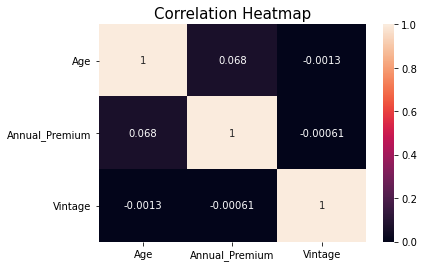

In [83]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Heatmap",size=15)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

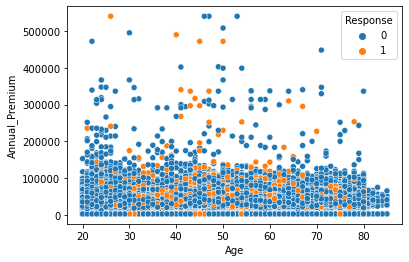

In [86]:
sns.scatterplot(df.Age,df.Annual_Premium,hue=df.Response)

<AxesSubplot:xlabel='Age', ylabel='Vintage'>

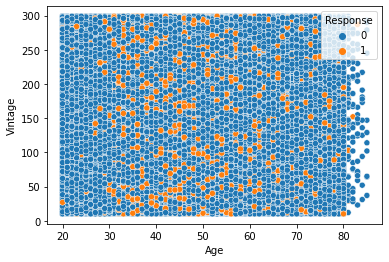

In [87]:
sns.scatterplot(df.Age,df.Vintage,hue=df.Response)

<AxesSubplot:xlabel='Annual_Premium', ylabel='Vintage'>

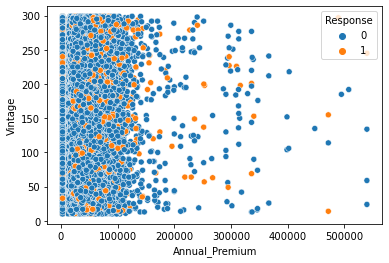

In [88]:
sns.scatterplot(df.Annual_Premium,df.Vintage,hue=df.Response)

#### Inferences
- Based on the correlation heatmap, we can observe that none of the pairs of numerical features have a considerable relationship with each other.
- Based on the scatterplots, on analyzing the relationship between two numerical features and also understanding how they help to seperate the target classes, we can conclude that the target classes cannot be seperated by the interaction of two numerical features.

# Data Preparation

In [100]:
data_copy = df.copy()

In [101]:
df.drop(["Vintage","Annual_Premium","Driving_License"],axis=1,inplace=True)

In [102]:
df.select_dtypes(include=np.object).nunique()

Gender                   2
Region_Code             13
Previously_Insured       2
Vehicle_Age              3
Vehicle_Damage           2
Policy_Sales_Channel     7
Response                 2
dtype: int64

Important notes about Encoding:
- Except region and sales policy, all other features can be one hot encoded as they have only around 2-3 unique categories.
- As region code and sales channel policy have more than 50 unique categories, we cannot encode them directly.
- Frequency encoding is not appropriate as it won't help in any logical interpretation.
- Label encoding is not possible as we don't have any logical order in the above two categorical features.
- Hence, we need to try to dummy encode them. 
- We will group together all categories which contribute less than 2% to the total records in the dataset under the category "others" to prevent adding more number of additional features

In [103]:
Region_Dict = {}
for i,a in list(zip(df.Region_Code.value_counts().index.unique(),df.Region_Code.value_counts(1)*100)):
    if a < 2:
        Region_Dict[i] = "Others"
    else:
        Region_Dict[i] = "Region_" + str(i)

In [104]:
Policy_Sales_Channel_Dict = {}
for i,a in list(zip(df.Policy_Sales_Channel.value_counts().index.unique(),df.Policy_Sales_Channel.value_counts(1)*100)):
    if a < 2:
        Policy_Sales_Channel_Dict[i] = "Others"
    else:
        Policy_Sales_Channel_Dict[i] = "Channel_" + str(i)

In [105]:
df.Region_Code = df.Region_Code.map(Region_Dict)
df.Policy_Sales_Channel = df.Policy_Sales_Channel.map(Policy_Sales_Channel_Dict)

In [106]:
df_feature = df.drop("Response",axis=1)
df_target= df.Response.astype("int")

In [107]:
df_num=df_feature.select_dtypes(include=np.number)
df_cat=df_feature.select_dtypes(include=np.object)

In [108]:
dummy=pd.get_dummies(data=df_cat,drop_first=True)

In [109]:
df_final=pd.concat([df_num,dummy],axis=1)
df_final.head()

,Age,Gender_Male,Region_Code_Region_Region_11,Region_Code_Region_Region_15,Region_Code_Region_Region_28,Region_Code_Region_Region_29,Region_Code_Region_Region_3,Region_Code_Region_Region_30,Region_Code_Region_Region_33,Region_Code_Region_Region_36,...,Previously_Insured_Vehicle_Not_Insured,Vehicle_Age_MoreThan2Years,Vehicle_Age_Years1-2,Vehicle_Damage_Vehicle_Not_Damaged,Policy_Sales_Channel_Channel_Channel_124,Policy_Sales_Channel_Channel_Channel_152,Policy_Sales_Channel_Channel_Channel_156,Policy_Sales_Channel_Channel_Channel_160,Policy_Sales_Channel_Channel_Channel_26,Policy_Sales_Channel_Channel_Others
0,44,1,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
1,76,1,0,0,0,0,1,0,0,0,...,1,0,1,1,0,0,0,0,1,0
2,47,1,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,21,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,29,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [110]:
from sklearn.model_selection import train_test_split 

In [130]:
xtrain,xtest,ytrain,ytest = train_test_split(df_final,df_target,test_size=0.30,random_state=0)

In [131]:
xtrain.head()

,Age,Gender_Male,Region_Code_Region_Region_11,Region_Code_Region_Region_15,Region_Code_Region_Region_28,Region_Code_Region_Region_29,Region_Code_Region_Region_3,Region_Code_Region_Region_30,Region_Code_Region_Region_33,Region_Code_Region_Region_36,...,Previously_Insured_Vehicle_Not_Insured,Vehicle_Age_MoreThan2Years,Vehicle_Age_Years1-2,Vehicle_Damage_Vehicle_Not_Damaged,Policy_Sales_Channel_Channel_Channel_124,Policy_Sales_Channel_Channel_Channel_152,Policy_Sales_Channel_Channel_Channel_156,Policy_Sales_Channel_Channel_Channel_160,Policy_Sales_Channel_Channel_Channel_26,Policy_Sales_Channel_Channel_Others
215357,31,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
262812,43,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
291557,25,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
197937,53,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
259434,26,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


# Model Building

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,f1_score,classification_report,confusion_matrix

In [117]:
results = pd.DataFrame({"Model":None,"Train F1":None,"Test F1":None,"CV Mean F1":None,"CV std in scores":None},index=range(0,6))

### Naive Bayes - Bernoulli

In [132]:
nb = BernoulliNB().fit(xtrain.drop("Age",axis=1),ytrain)
f1_train_nb = f1_score(ytrain,nb.predict(xtrain.drop("Age",axis=1)))
f1_test_nb = f1_score(ytest,nb.predict(xtest.drop("Age",axis=1)))
print("f1:",f1_train_nb)
print()
print("Model Performance Report")
print("Training Performance:",classification_report(ytrain,nb.predict(xtrain.drop("Age",axis=1))),sep="\n")
print()
print("Test Performance:",classification_report(ytest,nb.predict(xtest.drop("Age",axis=1))),sep="\n")

f1: 0.41785040854808303

Model Performance Report
Training Performance:
              precision    recall  f1-score   support

           0       0.96      0.74      0.83    234158
           1       0.29      0.76      0.42     32618

    accuracy                           0.74    266776
   macro avg       0.62      0.75      0.63    266776
weighted avg       0.88      0.74      0.78    266776


Test Performance:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83    100241
           1       0.29      0.77      0.42     14092

    accuracy                           0.74    114333
   macro avg       0.62      0.75      0.63    114333
weighted avg       0.87      0.74      0.78    114333



In [133]:
cv_nb = cross_val_score(BernoulliNB(),xtrain.drop("Age",axis=1),ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_nb.mean())
print("Deviation in f1 scores:",cv_nb.std())
results.iloc[0,0] = "Naive Bayes"
results.iloc[0,1] = f1_train_nb
results.iloc[0,2] = f1_test_nb
results.iloc[0,3] = cv_nb.mean()
results.iloc[0,4] = cv_nb.std()

Mean of f1 scores: 0.4190879363131472
Deviation in f1 scores: 0.0013424450577966141


### Decision Tree

In [134]:
dt = DecisionTreeClassifier().fit(xtrain,ytrain)
f1_train_dt = f1_score(ytrain,dt.predict(xtrain))
f1_test_dt = f1_score(ytest,dt.predict(xtest))
print("f1 score:",f1_train_dt)
print()
print("Model Performance Report")
print("Training Performance:",classification_report(ytrain,dt.predict(xtrain)),sep="\n")
print()
print("Test Performance:",classification_report(ytest,dt.predict(xtest)),sep="\n")

f1 score: 0.19211041192956477

Model Performance Report
Training Performance:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    234158
           1       0.70      0.11      0.19     32618

    accuracy                           0.89    266776
   macro avg       0.79      0.55      0.57    266776
weighted avg       0.87      0.89      0.85    266776


Test Performance:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93    100241
           1       0.36      0.06      0.11     14092

    accuracy                           0.87    114333
   macro avg       0.62      0.52      0.52    114333
weighted avg       0.82      0.87      0.83    114333



In [135]:
cv_dt = cross_val_score(DecisionTreeClassifier(),xtrain,ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_dt.mean())
print("Deviation in f1 scores:",cv_dt.std())
results.iloc[1,0] = "Decision Tree"
results.iloc[1,1] = f1_train_dt
results.iloc[1,2] = f1_test_dt
results.iloc[1,3] = cv_dt.mean()
results.iloc[1,4] = cv_dt.std()

Mean of f1 scores: 0.12043905856332543
Deviation in f1 scores: 0.0028234768891964163


### Random Forest

In [136]:
rf = RandomForestClassifier().fit(xtrain,ytrain)
f1_train_rf = f1_score(ytrain,rf.predict(xtrain))
f1_test_rf = f1_score(ytest,rf.predict(xtest))
print("f1:",f1_train_rf)
print()
print("Model Performance Report")
print("Training Performance:",classification_report(ytrain,rf.predict(xtrain)),sep="\n")
print()
print("Test Performance:",classification_report(ytest,rf.predict(xtest)),sep="\n")

f1: 0.21690884395581872

Model Performance Report
Training Performance:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    234158
           1       0.66      0.13      0.22     32618

    accuracy                           0.89    266776
   macro avg       0.78      0.56      0.58    266776
weighted avg       0.86      0.89      0.85    266776


Test Performance:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93    100241
           1       0.37      0.08      0.13     14092

    accuracy                           0.87    114333
   macro avg       0.63      0.53      0.53    114333
weighted avg       0.82      0.87      0.83    114333



In [137]:
cv_rf = cross_val_score(RandomForestClassifier(),xtrain,ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_rf.mean())
print("Deviation in f1 scores:",cv_rf.std())
results.iloc[2,0] = "Random Forest"
results.iloc[2,1] = f1_train_rf
results.iloc[2,2] = f1_test_rf
results.iloc[2,3] = cv_rf.mean()
results.iloc[2,4] = cv_rf.std()

Mean of f1 scores: 0.14016828966606373
Deviation in f1 scores: 0.0018474190356633925


### Adaboosting Classifier

In [138]:
ada = AdaBoostClassifier().fit(xtrain,ytrain)
f1_train_ada = f1_score(ytrain,ada.predict(xtrain))
f1_test_ada = f1_score(ytest,ada.predict(xtest))
print("f1:",f1_train_ada)
print()
print("Model Performance Report")
print("Training Performance:",classification_report(ytrain,ada.predict(xtrain)),sep="\n")
print()
print("Test Performance:",classification_report(ytest,ada.predict(xtest)),sep="\n")

f1: 0.0023233774571245146

Model Performance Report
Training Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    234158
           1       0.41      0.00      0.00     32618

    accuracy                           0.88    266776
   macro avg       0.64      0.50      0.47    266776
weighted avg       0.82      0.88      0.82    266776


Test Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100241
           1       0.42      0.00      0.00     14092

    accuracy                           0.88    114333
   macro avg       0.65      0.50      0.47    114333
weighted avg       0.82      0.88      0.82    114333



In [139]:
cv_ada = cross_val_score(AdaBoostClassifier(),xtrain,ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_ada.mean())
print("Deviation in f1 scores:",cv_ada.std())
results.iloc[3,0] = "Adaboost"
results.iloc[3,1] = f1_train_ada
results.iloc[3,2] = f1_test_ada
results.iloc[3,3] = cv_ada.mean()
results.iloc[3,4] = cv_ada.std()

Mean of f1 scores: 0.0035404269934191275
Deviation in f1 scores: 0.0019430493657176633


### Gradient Boosting

In [145]:
gb = GradientBoostingClassifier().fit(xtrain,ytrain)
f1_train_gb = f1_score(ytrain,gb.predict(xtrain))
f1_test_gb = f1_score(ytest,gb.predict(xtest))
print("f1:",f1_train_gb)
print()
print("Model Performance Report")
print("Training Performance:",classification_report(ytrain,gb.predict(xtrain)),sep="\n")
print()
print("Test Performance:",classification_report(ytest,gb.predict(xtest)),sep="\n")

f1: 0.0

Model Performance Report
Training Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    234158
           1       0.00      0.00      0.00     32618

    accuracy                           0.88    266776
   macro avg       0.44      0.50      0.47    266776
weighted avg       0.77      0.88      0.82    266776


Test Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100241
           1       0.00      0.00      0.00     14092

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



In [146]:
cv_gb = cross_val_score(GradientBoostingClassifier(),xtrain,ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_gb.mean())
print("Deviation in f1 scores:",cv_gb.std())
results.iloc[4,0] = "Gradient boost"
results.iloc[4,1] = f1_train_gb
results.iloc[4,2] = f1_test_gb
results.iloc[4,3] = cv_gb.mean()
results.iloc[4,4] = cv_gb.std()

Mean of f1 scores: 0.0
Deviation in f1 scores: 0.0


### XGB

In [142]:
xgb = XGBClassifier().fit(xtrain,ytrain)
f1_train_xgb = f1_score(ytrain,xgb.predict(xtrain))
f1_test_xgb = f1_score(ytest,xgb.predict(xtest))
print("f1:",f1_train_xgb)
print()
print("Model Performance Report")
print("Training Performance:",classification_report(ytrain,xgb.predict(xtrain)),sep="\n")
print()
print("Test Performance:",classification_report(ytest,xgb.predict(xtest)),sep="\n")

f1: 0.038511826934506124

Model Performance Report
Training Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    234158
           1       0.63      0.02      0.04     32618

    accuracy                           0.88    266776
   macro avg       0.75      0.51      0.49    266776
weighted avg       0.85      0.88      0.83    266776


Test Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100241
           1       0.47      0.02      0.03     14092

    accuracy                           0.88    114333
   macro avg       0.68      0.51      0.48    114333
weighted avg       0.83      0.88      0.82    114333



In [143]:
cv_xgb = cross_val_score(XGBClassifier(),xtrain,ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_xgb.mean())
print("Deviation in f1 scores:",cv_xgb.std())
results.iloc[5,0] = "XGB"
results.iloc[5,1] = f1_train_xgb
results.iloc[5,2] = f1_test_xgb
results.iloc[5,3] = cv_xgb.mean()
results.iloc[5,4] = cv_xgb.std()

Mean of f1 scores: 0.036732399339107866
Deviation in f1 scores: 0.006185112472696206


In [147]:
results

,Model,Train F1,Test F1,CV Mean F1,CV std in scores
0,Naive Bayes,0.41785,0.419601,0.419088,0.001342
1,Decision Tree,0.19211,0.107223,0.120439,0.002823
2,Random Forest,0.216909,0.12643,0.140168,0.001847
3,Adaboost,0.002323,0.002265,0.00354,0.001943
4,Gradient boost,0.0,0.0,0.0,0.0
5,XGB,0.038512,0.029561,0.036732,0.006185


#### Inferences - 

NOTE - Due to heavy imbalance in target classes, we need to give considerable importance to both precision and recall of class 1. Hence throughout the evaluation, we will focus on **F1 score**

We created 3 types of models - Probability, Tree based and boosting techniques.
- The naive bayes models produced the best results across all models despite the heavy imbalance due to the usage of probabilities only. It scored a f1 score of 0.419 on the test data and recorded average f1 score of 0.419 during cross validation, indicating no signs of overfitting.
- Tree based algorithms like decision tree and random forest recorded very poor scores across both train and test with f1 scores in the range of 0.10-0.20 with mean of f1 scores falling in the range of 0.11-0.14.
- Boosting techniques such as adaboost, gradient boost and xgb performed even worse, with very negligible scores across train and test, falling in the range of 0.0 to 0.03.
- Tree based and boosting based algorithms suffered heavily due to heavy imbalance in target classes across train and test where the proportion of class 0 to 1 is 87% to 13%. 
- In order to improve these scores, we need to oversample the minority class only in the TRAIN DATA, in order to improve learning of the class 1 during training and to prevent data leakage.

## OverSampling the Minority Class

In [148]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import BernoulliNB

In [149]:
print("Total instances = ",len(ytrain))
print("Instances of class 0 = ",len(ytrain[ytrain == 0]))
print("Instances of class 1 = ",len(ytrain[ytrain == 1]))
print("50% of class 0 = ",round(0.5*len(ytrain[ytrain == 0])))

Total instances =  266776
Instances of class 0 =  234158
Instances of class 1 =  32618
50% of class 0 =  117079


In [150]:
strategy = {1:117040}
smote = SMOTE(sampling_strategy=strategy,random_state=0)

In [151]:
xtrain_over,ytrain_over = smote.fit_resample(xtrain,ytrain)

In [152]:
ytrain_over.value_counts(1)*100

0    66.67407
1    33.32593
Name: Response, dtype: float64

In [153]:
results_smote = pd.DataFrame({"Model":None,"Train F1":None,"Test F1":None,"CV Mean F1":None,"CV std in scores":None},index=range(0,4))

## Creating Baseline Models with Oversampled Data

In [154]:
nb = BernoulliNB().fit(xtrain_over.drop("Age",axis=1),ytrain_over)
f1_train_nb = f1_score(ytrain_over,nb.predict(xtrain_over.drop("Age",axis=1)))
f1_test_nb = f1_score(ytest,nb.predict(xtest.drop("Age",axis=1)))

print("f1 on train:",f1_train_nb)
print("f1 on test:",f1_test_nb)

print()
print("Model Performance Report on train")
print(classification_report(ytrain_over,nb.predict(xtrain_over.drop("Age",axis=1))))

print("Model Performance Report on test")
print(classification_report(ytest,nb.predict(xtest.drop("Age",axis=1))))

f1 on train: 0.7124017012943301
f1 on test: 0.4332646381379561

Model Performance Report on train
              precision    recall  f1-score   support

           0       0.93      0.69      0.79    234158
           1       0.59      0.90      0.71    117040

    accuracy                           0.76    351198
   macro avg       0.76      0.79      0.75    351198
weighted avg       0.82      0.76      0.77    351198

Model Performance Report on test
              precision    recall  f1-score   support

           0       0.98      0.69      0.81    100241
           1       0.29      0.89      0.43     14092

    accuracy                           0.71    114333
   macro avg       0.63      0.79      0.62    114333
weighted avg       0.89      0.71      0.76    114333



In [155]:
cv_nb = cross_val_score(BernoulliNB(),xtrain_over.drop("Age",axis=1),ytrain_over,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_nb.mean())
print("Deviation in f1 scores:",cv_nb.std())
results_smote.iloc[0,0] = "Naive Bayes"
results_smote.iloc[0,1] = f1_train_nb
results_smote.iloc[0,2] = f1_test_nb
results_smote.iloc[0,3] = cv_nb.mean()
results_smote.iloc[0,4] = cv_nb.std()

Mean of f1 scores: 0.7120580902504976
Deviation in f1 scores: 0.0027893440350237595


In [156]:
dt = DecisionTreeClassifier().fit(xtrain_over,ytrain_over)
f1_train_dt = f1_score(ytrain_over,dt.predict(xtrain_over))
f1_test_dt = f1_score(ytest,dt.predict(xtest))

print("f1 on train:",f1_train_dt)
print("f1 on test:",f1_test_dt)

print()
print("Model Performance Report on train")
print(classification_report(ytrain_over,dt.predict(xtrain_over)))

print("Model Performance Report on test")
print(classification_report(ytest,dt.predict(xtest)))

f1 on train: 0.737694454911068
f1 on test: 0.4276071326487984

Model Performance Report on train
              precision    recall  f1-score   support

           0       0.90      0.80      0.85    234158
           1       0.67      0.82      0.74    117040

    accuracy                           0.81    351198
   macro avg       0.78      0.81      0.79    351198
weighted avg       0.82      0.81      0.81    351198

Model Performance Report on test
              precision    recall  f1-score   support

           0       0.95      0.78      0.86    100241
           1       0.31      0.69      0.43     14092

    accuracy                           0.77    114333
   macro avg       0.63      0.74      0.64    114333
weighted avg       0.87      0.77      0.80    114333



In [157]:
cv_dt = cross_val_score(DecisionTreeClassifier(),xtrain_over,ytrain_over,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_dt.mean())
print("Deviation in f1 scores:",cv_dt.std())
results_smote.iloc[1,0] = "Decision Tree"
results_smote.iloc[1,1] = f1_train_dt
results_smote.iloc[1,2] = f1_test_dt
results_smote.iloc[1,3] = cv_dt.mean()
results_smote.iloc[1,4] = cv_dt.std()

Mean of f1 scores: 0.7125564594092854
Deviation in f1 scores: 0.014752997807350333


In [158]:
rb = RandomForestClassifier().fit(xtrain_over,ytrain_over)
f1_train_rb = f1_score(ytrain_over,rb.predict(xtrain_over))
f1_test_rb = f1_score(ytest,rb.predict(xtest))

print("f1 on train:",f1_train_rb)
print("f1 on test:",f1_test_rb)

print()
print("Model Performance Report on train")
print(classification_report(ytrain_over,rb.predict(xtrain_over)))

print("Model Performance Report on test")
print(classification_report(ytest,rb.predict(xtest)))

f1 on train: 0.7396658106514746
f1 on test: 0.4286367098248286

Model Performance Report on train
              precision    recall  f1-score   support

           0       0.90      0.79      0.85    234158
           1       0.67      0.83      0.74    117040

    accuracy                           0.81    351198
   macro avg       0.79      0.81      0.79    351198
weighted avg       0.82      0.81      0.81    351198

Model Performance Report on test
              precision    recall  f1-score   support

           0       0.95      0.78      0.86    100241
           1       0.31      0.70      0.43     14092

    accuracy                           0.77    114333
   macro avg       0.63      0.74      0.64    114333
weighted avg       0.87      0.77      0.80    114333



In [159]:
cv_rb = cross_val_score(RandomForestClassifier(),xtrain_over,ytrain_over,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_rb.mean())
print("Deviation in f1 scores:",cv_rb.std())
results_smote.iloc[2,0] = "Random Forest Classifier"
results_smote.iloc[2,1] = f1_train_rb
results_smote.iloc[2,2] = f1_test_rb
results_smote.iloc[2,3] = cv_rb.mean()
results_smote.iloc[2,4] = cv_rb.std()

Mean of f1 scores: 0.7158460617255032
Deviation in f1 scores: 0.014527372253342634


In [160]:
xgb_over = XGBClassifier().fit(xtrain_over,ytrain_over)
f1_train_xgb_over = f1_score(ytrain_over,xgb_over.predict(xtrain_over))
f1_test_xgb_over = f1_score(ytest,xgb_over.predict(xtest))

print("f1 on train:",f1_train_xgb_over)
print("f1 on test:",f1_test_xgb_over)

print()
print("Model Performance Report on train")
print(classification_report(ytrain_over,xgb_over.predict(xtrain_over)))

print("Model Performance Report on test")
print(classification_report(ytest,xgb_over.predict(xtest)))

f1 on train: 0.720215381366797
f1 on test: 0.4444491010435439

Model Performance Report on train
              precision    recall  f1-score   support

           0       0.89      0.78      0.83    234158
           1       0.64      0.82      0.72    117040

    accuracy                           0.79    351198
   macro avg       0.77      0.80      0.78    351198
weighted avg       0.81      0.79      0.79    351198

Model Performance Report on test
              precision    recall  f1-score   support

           0       0.96      0.77      0.85    100241
           1       0.32      0.75      0.44     14092

    accuracy                           0.77    114333
   macro avg       0.64      0.76      0.65    114333
weighted avg       0.88      0.77      0.80    114333



In [161]:
cv_xgb_over = cross_val_score(XGBClassifier(),xtrain_over,ytrain_over,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_xgb_over.mean())
print("Deviation in f1 scores:",cv_xgb_over.std())
results_smote.iloc[3,0] = "XGB Classifier"
results_smote.iloc[3,1] = f1_train_xgb_over
results_smote.iloc[3,2] = f1_test_xgb_over
results_smote.iloc[3,3] = cv_xgb_over.mean()
results_smote.iloc[3,4] = cv_xgb_over.std()

Mean of f1 scores: 0.7099952778092339
Deviation in f1 scores: 0.015892402293619656


In [162]:
results_smote

,Model,Train F1,Test F1,CV Mean F1,CV std in scores
0,Naive Bayes,0.712402,0.433265,0.712058,0.002789
1,Decision Tree,0.737694,0.427607,0.712556,0.014753
2,Random Forest Classifier,0.739666,0.428637,0.715846,0.014527
3,XGB Classifier,0.720215,0.444449,0.709995,0.015892


#### Inferences - 
On building baseline models using oversampled data, we can conclude the following - 
- We built 3 baseline models - Bernoulli Naive bayes, Decision tree and Random Forest.
- Decision tree and random forest were giving higher f1 scores across the train at 0.75.
- However, since tree based algorithms are prone to overfitting, the deviation in cross validation scores was close to 3% and f1 score on test was recorded around 0.424-0.426
- The naive bayes model generalized better and provided the most consistent results, based on lowest deviation of 0.01%  compared to the 2-3% deviation of tree models.
- However, naive bayes model doesnt have much scope for improvement in terms of parameters to tune and it produced very low precision for class 1 on test data i.e 0.29 compared to recall of 0.89. 
- In this respect, tree models performed better with slightly lesser difference in recall and precision scores in test sample. Hence we would choose a tree based model.
- Since, decision tree was giving a lower deviation in scores, lesser complex to tune and less time consuming due to being a standalone estimator, we chose the decision tree for further tuning.

## Feature Selection

In [163]:
results_features = pd.DataFrame({"Model":None,"Train F1":None,"Test F1":None,"CV Mean F1":None,"CV std in scores":None},index=range(0,3))

In [164]:
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_auc_score,roc_curve

### Recursive Feature Elimination

In [165]:
 rfe = RFE(DecisionTreeClassifier(),n_features_to_select=10).fit(xtrain_over,ytrain_over)

In [166]:
ranking=rfe.ranking_
ranking

array([ 1,  1, 10,  5,  1, 13,  9, 14, 15, 11,  4,  6,  1,  2,  1, 12,  1,
        1,  7,  1,  8,  1,  1,  3])

In [167]:
print("Best Features:", xtrain_over.columns[ranking == 1])

Best Features: Index(['Age', 'Gender_Male', 'Region_Code_Region_Region_28',
       'Region_Code_Region_Region_50',
       'Previously_Insured_Vehicle_Not_Insured', 'Vehicle_Age_Years1-2',
       'Vehicle_Damage_Vehicle_Not_Damaged',
       'Policy_Sales_Channel_Channel_Channel_152',
       'Policy_Sales_Channel_Channel_Channel_160',
       'Policy_Sales_Channel_Channel_Channel_26'],
      dtype='object')


f1 on train: 0.712064555693495
f1 on test: 0.4468422461544797

Model Performance Report on train
              precision    recall  f1-score   support

           0       0.89      0.76      0.82    234079
           1       0.63      0.81      0.71    117040

    accuracy                           0.78    351119
   macro avg       0.76      0.79      0.77    351119
weighted avg       0.81      0.78      0.79    351119


Mean of f1 scores: 0.7045781384586608
Deviation in f1 scores: 0.004284437045253738

Model Performance Report on test
              precision    recall  f1-score   support

           0       0.96      0.76      0.85    100320
           1       0.31      0.77      0.45     14013

    accuracy                           0.77    114333
   macro avg       0.64      0.77      0.65    114333
weighted avg       0.88      0.77      0.80    114333



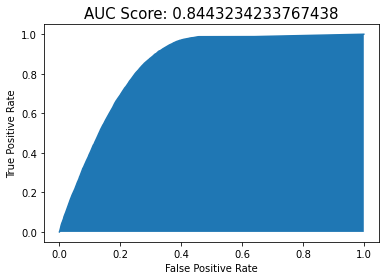

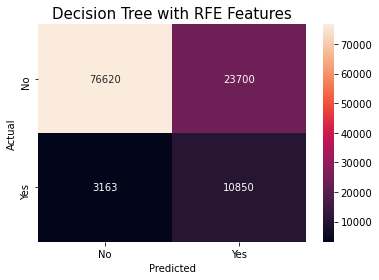

In [168]:
rfe_features =  xtrain_over.columns[ranking == 1]

dt_rfe = DecisionTreeClassifier().fit(xtrain_over[list(rfe_features)],ytrain_over)
f1_train_dt_rfe = f1_score(ytrain_over,dt_rfe.predict(xtrain_over[list(rfe_features)]))
f1_test_dt_rfe = f1_score(ytest,dt_rfe.predict(xtest[list(rfe_features)]))

print("f1 on train:",f1_train_dt_rfe)
print("f1 on test:",f1_test_dt_rfe)

print()
print("Model Performance Report on train")
print(classification_report(ytrain_over,dt_rfe.predict(xtrain_over[list(rfe_features)])))
print()
cv_dt_rfe = cross_val_score(DecisionTreeClassifier(),xtrain_over[list(rfe_features)],ytrain_over,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_dt_rfe.mean())
print("Deviation in f1 scores:",cv_dt_rfe.std())
results_features.iloc[0,0] = "Recursive Feature Elimination"
results_features.iloc[0,1] = f1_train_dt_rfe
results_features.iloc[0,2] = f1_test_dt_rfe
results_features.iloc[0,3] = cv_dt_rfe.mean()
results_features.iloc[0,4] = cv_dt_rfe.std()
print()
print("Model Performance Report on test")
print(classification_report(ytest,dt_rfe.predict(xtest[list(rfe_features)])))

fpr, tpr, thres = roc_curve(ytest,dt_rfe.predict_proba(xtest[list(rfe_features)])[:,1])
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr)
plt.title(f"AUC Score: {roc_auc_score(ytest,dt_rfe.predict_proba(xtest[list(rfe_features)])[:,1])}",size=15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

sns.heatmap(confusion_matrix(ytest,dt_rfe.predict(xtest[list(rfe_features)])),annot=True,fmt="g")
plt.title("Decision Tree with RFE Features",size=15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5,1.5],["No","Yes"])
plt.yticks([0.5,1.5],["No","Yes"])
plt.show()

#### Inferences - 
Based on finding out the best set of features for a decision tree using multiple techniques, we concluded the following - 
- Using Forward Feature Elimination, the decision tree model scored the highest f1 score on train sample i.e 0.75. However, when using cross validation, the model scored the recorded higher deviation in scores than the other 2 models and also scored the lowest f1 score on test i.e 0.42 due to the instability.
- Between the decision tree models using set of features from Recursive feature elimination and feature importances, we had similar scores. However, the model using feature importances recorded a high f1 score on test i.e 0.4434, higher train f1 score of 0.72 and higher mean cv score of 0.7119.

Hence we will use the decision tree model with set of features determined by feature importances.

## Parameter Optimization

In [178]:
from sklearn.model_selection import GridSearchCV


params = {"max_depth":range(2,10),"criterion":["gini","entropy"],"min_samples_leaf":[30,40,50],"min_samples_split":[60,80,100]}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=params,cv=3,scoring="f1").fit(xtrain_over[list(rfe_features)],ytrain_over)

In [189]:
grid_params=grid.best_params_

In [191]:
grid_params

{'max_depth': 9, 'min_sampples_leaf': 30, 'min_samples_split': 60}

f1 on train: 0.7034879561397894
f1 on test: 0.4502890173410405

Model Performance Report on train
              precision    recall  f1-score   support

           0       0.88      0.76      0.82    234079
           1       0.63      0.80      0.70    117040

    accuracy                           0.78    351119
   macro avg       0.76      0.78      0.76    351119
weighted avg       0.80      0.78      0.78    351119


Mean of f1 scores: 0.7024976997042532
Deviation in f1 scores: 0.00451094018470376

Model Performance Report on test
              precision    recall  f1-score   support

           0       0.96      0.77      0.85    100320
           1       0.32      0.78      0.45     14013

    accuracy                           0.77    114333
   macro avg       0.64      0.77      0.65    114333
weighted avg       0.88      0.77      0.80    114333



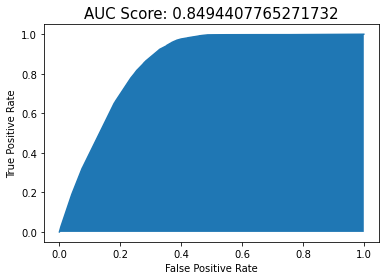

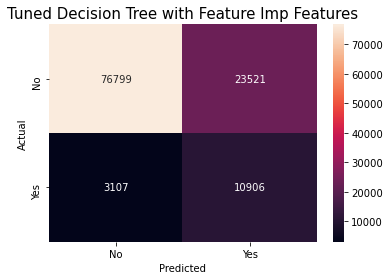

In [188]:
dt_grid = DecisionTreeClassifier(criterion="gini",max_depth=9,min_samples_leaf=30,min_samples_split=60).fit(xtrain_over[list(rfe_features)],ytrain_over)
f1_train_dt_grid = f1_score(ytrain_over,dt_grid.predict(xtrain_over[list(rfe_features)]))
f1_test_dt_grid = f1_score(ytest,dt_grid.predict(xtest[list(rfe_features)]))

print("f1 on train:",f1_train_dt_grid)
print("f1 on test:",f1_test_dt_grid)

print()
print("Model Performance Report on train")
print(classification_report(ytrain_over,dt_grid.predict(xtrain_over[list(rfe_features)])))
print()
cv_dt_grid = cross_val_score(DecisionTreeClassifier(criterion="gini",max_depth=9,min_samples_leaf=30,min_samples_split=60),xtrain_over[list(rfe_features)],ytrain_over,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_dt_grid.mean())
print("Deviation in f1 scores:",cv_dt_grid.std())
results_features.iloc[2,0] = "Feature Importances"
results_features.iloc[2,1] = f1_train_dt_grid
results_features.iloc[2,2] = f1_test_dt_grid
results_features.iloc[2,3] = cv_dt_grid.mean()
results_features.iloc[2,4] = cv_dt_grid.std()
print()
print("Model Performance Report on test")
print(classification_report(ytest,dt_grid.predict(xtest[list(rfe_features)])))

fpr, tpr, thres = roc_curve(ytest,dt_grid.predict_proba(xtest[list(rfe_features)])[:,1])
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr)
plt.title(f"AUC Score: {roc_auc_score(ytest,dt_grid.predict_proba(xtest[list(rfe_features)])[:,1])}",size=15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

sns.heatmap(confusion_matrix(ytest,dt_grid.predict(xtest[list(rfe_features)])),annot=True,fmt="g")
plt.title("Tuned Decision Tree with Feature Imp Features",size=15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5,1.5],["No","Yes"])
plt.yticks([0.5,1.5],["No","Yes"])
plt.show()

#### Inferences - 
- Based on finding the optimal parameters for decision tree using top features from feature importances, we obtained a model with a slight increase in f1 score on class 1 i.e from 0.4468 to 0.4502.
- Also the model noticed an increase in auc score from 0.8443 to 0.8494.

# Business Interpretation of the Model

- We started with a dataset consisting of around 380K Health insurance holders, of which only 13% had gone on to purchase a vehicle insurance.


- Based on an in-depth analysis of all features and extensive trial and error, we have created a Decision tree model to predict which health insurance customers would buy a vehicle insurance.


- The model has been tuned with the optimal parameters to improve quality of the predictions.

**Key insights about the model** -
- For creating the models the most useful features for identifying potential vehicle insurance customers were chosen. These features can be the key focus points for salesmen or the organization to target when trying to identify potential vehicle insurance holders. The best features were whether a health insurance holder - 
     - Had a car which was not damaged before.
     - Age of the holder.
     - Had a vehicle that was not insured previously.
     - Was a male
     - Belonged to the regions coded 28, 50.
     - Was approached by policy sales channel 26, 152 or 160.
     - Had a vehicle that was around 1-2 years old.
     
     
- Based on the chosen features and optimal parameters the final model produced a train f1 score of 0.70 during training phase and scored a f1 score of 0.45 during test. The model was very reliable and produced consistent results, based on a deviation in f1 scores across several test samples calculated to only 0.5%.


